# NFL Passing Yards Prediction (Linear Regression)


In [11]:
from pathlib import Path
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [12]:
DATA_PATH = Path("data") / "nfl_passing_yards_dataset.csv"
RESULTS_DIR = Path('results')
RESULTS_DIR.mkdir(exist_ok=True)

df = pd.read_csv(DATA_PATH)
display(df.head())

FEATURES = ['Pass_Attempts','Completions','Completion_Pct','Defense_Rank','Pace','Wind_MPH']
TARGET = 'Pass_Yards'

missing = [c for c in FEATURES + [TARGET] if c not in df.columns]
if missing:
    raise ValueError("Missing columns: " + str(missing))


if TARGET in FEATURES:
    raise ValueError("Data leakage: target included in features")


,Pass_Attempts,Completions,Completion_Pct,Defense_Rank,Pace,Wind_MPH,Pass_Yards
0,18,8,0.454380,9,1.082035,4.402822,87.547585
1,45,24,0.543539,7,0.890643,14.755922,251.114030
2,41,21,0.513257,3,1.207771,15.222376,298.330999
3,32,15,0.482515,10,1.064356,11.763922,191.081471
4,32,18,0.556325,17,0.953699,3.096896,212.638813


In [13]:
X = df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = Pipeline([
 ('imputer', SimpleImputer(strategy='median')),
 ('reg', LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = float(np.sqrt(mean_squared_error(y_test, y_pred))) # On average, how far off are predictions. Big mistakes are penalized more. Sensitive to outliers
mae = float(mean_absolute_error(y_test, y_pred)) # What is the average absolute error
r2 = float(r2_score(y_test, y_pred)) # Want .85+ - Very strong metric.

metrics = {'rmse':rmse,'mae':mae,'r2':r2,'features':FEATURES}
print(metrics)

{'rmse': 28.959127373214244, 'mae': 23.051883912694663, 'r2': 0.8858163234538905, 'features': ['Pass_Attempts', 'Completions', 'Completion_Pct', 'Defense_Rank', 'Pace', 'Wind_MPH']}


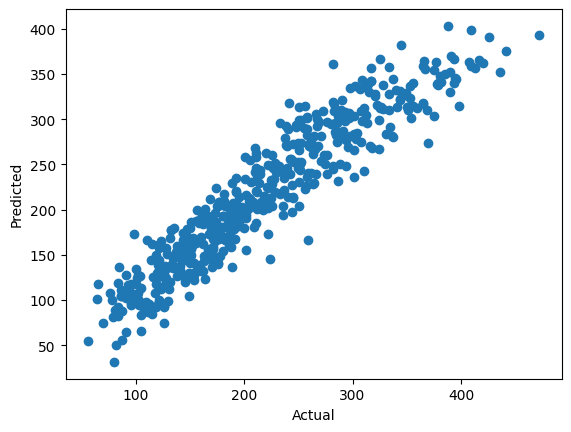

Wrote: C:\Users\Owner\Desktop\GitHub Projects\ML and DS Highlights\machine-learning-lab\notebooks\jupyter\nfl-passing-yards-prediction\results\metrics.json


In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

out_metrics = RESULTS_DIR / 'metrics.json'
out_metrics.write_text(json.dumps(metrics, indent=2))
print('Wrote:', out_metrics.resolve())
